# Library import

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf

import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/tnt/TASK 2'

/content/drive/MyDrive/tnt/TASK 2


# data load

In [ ]:
df = pd.read_pickle("/content/drive/Shareddrives/TNT/정규세션/2022년 1학기/산업 인공지능/TASK2-wafer map /LSWMD.pkl")

# EDA

EDA(Exploratory Data Analysis, 탐색적 데이터 분석)을 통해 데이터가 어떠한 형태인지 살펴보세요!
ex) 열별로 데이터 종류, 개수세보기, 데이터 불균형 상태인지 막대그래프 그려보기, wafermap을 failureType별로 그려보기 등등..

In [ ]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [ ]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


# Check List
*  데이터 설명
*  예측해야 하는 target값의 분포
*  결측치 혹은 이상치
*  분류상 유의미한 데이터인지 판단



# 새 섹션

# data summary

In [ ]:
df.sample(10)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
761208,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",1109.0,lot45497,19.0,[[Test]],[[none]]
709007,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,...",516.0,lot43387,3.0,[[Training]],[[none]]
205716,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2,...",533.0,lot13096,19.0,[],[]
367889,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4556.0,lot21988,2.0,[],[]
460226,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",712.0,lot28342,18.0,[],[]
430897,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1546.0,lot26107,1.0,[],[]
564340,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,lot35437,18.0,[],[]
207424,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2418.0,lot13196,5.0,[],[]
634856,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,lot39970,5.0,[],[]
419893,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1724.0,lot25179,13.0,[],[]


In [ ]:
df.info() #811,457 data with Non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


## sample wafer img

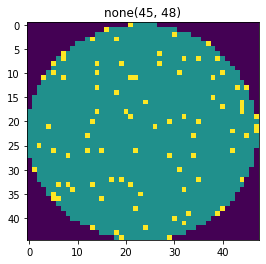

In [ ]:
idx = 0
img = df['waferMap'][idx]
plt.title(df['failureType'][idx][0][0]+ str(img.shape))
plt.imshow(img)

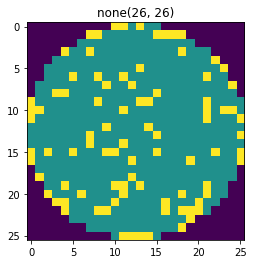

In [ ]:
idx = 1000
img = df['waferMap'][idx]
plt.title(df['failureType'][idx][0][0]+ str(img.shape))
plt.imshow(img)

## lotName

### How to show help

In [ ]:
pd.DataFrame.plot.bar?

In [ ]:
pd.DataFrame.plot?

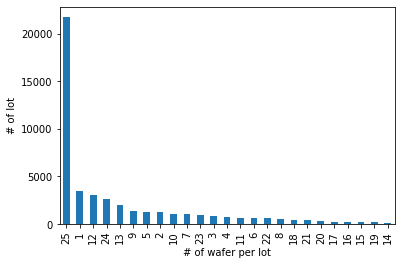

In [ ]:
bar_ = df.lotName.value_counts().value_counts().plot.bar(xlabel='# of wafer per lot',ylabel='# of lot')
bar_

## waferIndex

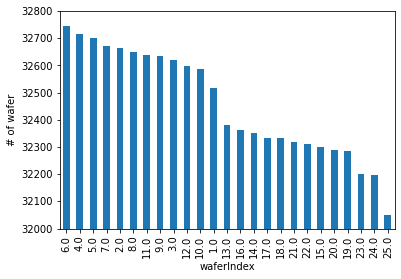

In [ ]:
df.waferIndex.value_counts().plot.bar(ylim=(32000,32800),xlabel='waferIndex',ylabel='# of wafer')

# New insight of data
*  조사결과 LOT은 wafer 25을 부르는 표현
*  1 lot = 25 wafers
*  데이터에서 wafer index가 1\~25까지 존재 lotName과 waferIndex는 사실 비슷한 넘버링 표현 (1lot마다 1\~25 waferIndex가 돌아감)


> wafer index별로 균일한 분포를 보여야 하지만, 데이터에서는 결측치가 존재하는것으로 보임. 그러나 classification에서 사진의 순서는 중요치 않다고 생각해 **waferIndex와 lotName은 고려하지 않음**


In [ ]:
condition = (df.failureType == 'Center')
df[condition]

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
44,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,20.0,[[Training]],[[Center]]
49,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,25.0,[[Training]],[[Center]]
604,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1,...",533.0,lot25,5.0,[[Training]],[[Center]]
729,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1,...",533.0,lot30,5.0,[[Training]],[[Center]]
893,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,...",533.0,lot36,19.0,[[Training]],[[Center]]
...,...,...,...,...,...,...
810049,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47485,2.0,[[Test]],[[Center]]
810087,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47486,15.0,[[Test]],[[Center]]
810308,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47495,11.0,[[Test]],[[Center]]
810604,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1,...",600.0,lot47507,7.0,[[Test]],[[Center]]


In [ ]:
label = list()
for typ in tqdm(df.failureType):
    if len(typ) == 0:
        label.append('-')
        continue
    label.append(typ[0][0])

100%|██████████| 811457/811457 [00:00<00:00, 1527703.52it/s]


In [ ]:
fault_list = np.unique(label) # 9가지 type
fault_list

array(['-', 'Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc',
       'Near-full', 'Random', 'Scratch', 'none'], dtype='<U9')

In [ ]:
pd.DataFrame(label).value_counts()

-            638507
none         147431
Edge-Ring      9680
Edge-Loc       5189
Center         4294
Loc            3593
Scratch        1193
Random          866
Donut           555
Near-full       149
dtype: int64

In [ ]:
pd.DataFrame(label).value_counts(normalize=True)*100

-            78.686486
none         18.168677
Edge-Ring     1.192916
Edge-Loc      0.639467
Center        0.529172
Loc           0.442784
Scratch       0.147019
Random        0.106722
Donut         0.068395
Near-full     0.018362
dtype: float64

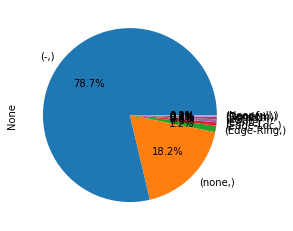

In [ ]:
fault_ratio = (pd.DataFrame(label).value_counts(normalize=True)*100)
pie_chart = fault_ratio.plot.pie(autopct='%.1f%%')
pie_chart

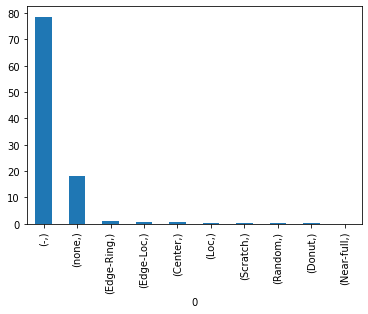

In [ ]:
fault_ratio.plot.bar()

In [ ]:
pd.DataFrame(label)

,0
0,none
1,none
2,none
3,none
4,none
...,...
811452,Edge-Ring
811453,Edge-Loc
811454,Edge-Ring
811455,-


In [ ]:
df['failureType'] = pd.DataFrame(label)

In [ ]:
condition = (df.trianTestLabel=='Training') # 54,355, labeled data
df[condition].failureType.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


none         36730
Edge-Ring     8554
Center        3462
Edge-Loc      2417
Loc           1620
Random         609
Scratch        500
Donut          409
Near-full       54
Name: failureType, dtype: int64

In [ ]:
condition = (df.trianTestLabel=='Test') # 118,595
df[condition].failureType.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


none         110701
Edge-Loc       2772
Loc            1973
Edge-Ring      1126
Center          832
Scratch         693
Random          257
Donut           146
Near-full        95
Name: failureType, dtype: int64

In [ ]:
df.sample(5)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
33702,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,...",741.0,lot3209,11.0,[],-
381769,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2393.0,lot22810,16.0,[],-
162702,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",14116.0,lot10470,5.0,[],-
524318,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",515.0,lot32790,14.0,[],-
178724,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3036.0,lot11450,24.0,[],-


## fault type image

In [ ]:
def typ_images(n=5):
    for i, typ in enumerate(fault_list):
        condition = (df.failureType == typ)
        df_tmp = df.waferMap[condition].sample(n)
        fig_size = (n*3,6)
        fig = plt.figure(figsize=fig_size)

        for j in range(n):
            plt.subplot(1,n,j+1)
            img = df_tmp.iloc[j]
            plt.title(typ+str(img.shape))
            plt.imshow(img)
        plt.tight_layout()
typ_images(10)

## dieSize

In [ ]:
wafer_size = list()
for i, img in enumerate(df.waferMap):
    wafer_size.append(img.shape)


In [ ]:
df['waferSize'] = wafer_size

In [ ]:
wafer_area = list()
for size in wafer_size:
    tmp = size[0]*size[1]
    wafer_area.append(tmp)

In [ ]:
df['waferArea'] = wafer_area

In [ ]:
df[['dieSize','waferArea']].corr() # dieSize & waferArea are correlated by linear relation

# Classification model

In [ ]:
from sklearn.metrics import f1_score
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D
from tensorflow.keras.layers import Dropout, MaxPooling2D

## data preprosessing

In [ ]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [ ]:
label = list()
for typ in tqdm(df.failureType):
    if len(typ) == 0:
        label.append('-')
        continue
    label.append(typ[0][0])

df['failureType'] = pd.DataFrame(label)

100%|██████████| 811457/811457 [00:00<00:00, 1698227.40it/s]


In [ ]:
import cv2
def cubic_resize(x):
  resized_x = cv2.resize(x, dsize=(32, 32), interpolation=cv2.INTER_CUBIC) # BICUBIC INTERPOLATION
  return resized_x

def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1

df['waferSize']=df.waferMap.apply(find_dim)

In [ ]:
condition = (df.failureType != '-')

x = 0
y = 0
for size in df.waferSize[condition]:
    x += size[0]
    y += size[1]

print('mean wafer size: ',round(x/len(df.waferSize[condition])),round(y/len(df.waferSize[condition]))) # label 된 데이터 기준 35  35

mean wafer size:  35 35


In [ ]:
width = 32 

In [ ]:
condition = (df.failureType != '-')
data = df.drop(['waferIndex','lotName','dieSize','trianTestLabel'],axis=1)
data = data[condition]
del df

In [ ]:
data['resized_wafer']=data.waferMap.apply(cubic_resize)

In [ ]:
images = data.resized_wafer.values
labels = data.failureType.values
X = np.zeros((len(images), width, width))

for i in range(len(images)):
  X[i,:,:] = images[i]
X = X.reshape((-1, width , width , 1))

print(X.shape)
print(labels.shape)

new_x = np.zeros((X.shape[0], width, width, 3))

for w in tqdm(range(X.shape[0])):
    for i in range(width):
        for j in range(width):
            new_x[w, i, j, int(X[w, i, j])-1] = 1 
del X,images

(172950, 32, 32, 1)
(172950,)


100%|██████████| 172950/172950 [02:00<00:00, 1433.57it/s]


In [ ]:
labels = np.array(data.failureType)

In [ ]:
import pickle
with open("new_x.pickle","wb") as fw:
    pickle.dump(new_x, fw)
 
with open("labels.pickle","wb") as fw:
    pickle.dump(labels, fw)

## load newx and labels

In [ ]:
import pickle

## Load pickle
with open("new_x.pickle","rb") as fr:
    new_x = pickle.load(fr)

with open("labels.pickle","rb") as fr:
    labels = pickle.load(fr)

In [ ]:
# train test split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
x_train, x_test, y_train, y_test = train_test_split(new_x, encoded_labels, test_size=0.2, shuffle=True, stratify=encoded_labels, random_state=42)
unaugmented_x_train = x_train
unaugmented_y_train = y_train

In [ ]:
faulty_case = np.unique(pd.DataFrame(encoder.inverse_transform(y_train)))
faulty_case

array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
       'Random', 'Scratch', 'none'], dtype=object)

In [ ]:
faulty_case_dict =dict()

y_train_str = encoder.inverse_transform(y_train)
print("Train dataset")
for i, f in enumerate(faulty_case) :
    print('{} : {}'.format(f, len(y_train_str[y_train_str==f])))
    faulty_case_dict[i] = f

Train dataset
Center : 3435
Donut : 444
Edge-Loc : 4151
Edge-Ring : 7744
Loc : 2875
Near-full : 119
Random : 693
Scratch : 954
none : 117945


## Augumentation with CAE

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, Input, models
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))
X_train = x_train.astype(np.float32)

In [ ]:
conv_encoder = keras.models.Sequential([
  keras.layers.Reshape([width,width,3], input_shape = [width,width,3]),                                      
  keras.layers.Conv2D(16, kernel_size = 3, padding = 'same', activation = 'selu'),
  keras.layers.MaxPool2D(pool_size = 2),
  keras.layers.Conv2D(32, kernel_size = 3, padding = 'same', activation = 'selu'),
  keras.layers.MaxPool2D(pool_size = 2),
  keras.layers.Conv2D(64, kernel_size = 3, padding = 'same', activation = 'selu'),
  keras.layers.MaxPool2D(pool_size = 2)
])

conv_decoder = keras.models.Sequential([
  keras.layers.Conv2DTranspose(32, kernel_size = 3, padding = 'same', activation = 'selu', strides = 2, input_shape = [4,4,64]),
  keras.layers.Conv2DTranspose(16, kernel_size = 3, padding = 'same', activation = 'selu', strides = 2),
  keras.layers.Conv2DTranspose(3, kernel_size = 3, padding = 'same', activation = 'sigmoid', strides = 2),
  keras.layers.Reshape([width,width,3]) 
])

conv_encoder.compile

Convolutional_AutoEncoder = keras.models.Sequential([conv_encoder, conv_decoder])
Convolutional_AutoEncoder.compile(loss="binary_crossentropy",
                   optimizer='adam', metrics=[rounded_accuracy])
Convolutional_AutoEncoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 4, 4, 64)          23584     
                                                                 
 sequential_1 (Sequential)   (None, 32, 32, 3)         23523     
                                                                 
Total params: 47,107
Trainable params: 47,107
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Convolutional_AutoEncoder.fit(X_train, X_train, epochs = 5, shuffle = True,batch_size = 64)

Epoch 1/5
1081/1081 [==============================] - 15s 6ms/step - loss: 0.1890 - rounded_accuracy: 0.9277
Epoch 2/5
1081/1081 [==============================] - 6s 6ms/step - loss: 0.1402 - rounded_accuracy: 0.9435
Epoch 3/5
1081/1081 [==============================] - 6s 6ms/step - loss: 0.1245 - rounded_accuracy: 0.9476
Epoch 4/5
1081/1081 [==============================] - 7s 6ms/step - loss: 0.1142 - rounded_accuracy: 0.9505
Epoch 5/5
1081/1081 [==============================] - 6s 6ms/step - loss: 0.1067 - rounded_accuracy: 0.9529


In [ ]:
y_train = encoder.inverse_transform(y_train)

In [ ]:
# augment function define
def gen_data(wafer, label, AutoEncoder):
    encoder, decoder = AutoEncoder.layers
    encoded_x = encoder.predict(wafer)
    gen_x = np.zeros((1, width, width, 3))
    
    for i in range((1000//len(wafer))):
        noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.1, size = (len(encoded_x), 4, 4, 64)) 
        noised_gen_x = decoder.predict(noised_encoded_x)
        gen_x = np.concatenate((gen_x, noised_gen_x), axis=0)
    gen_y = np.full((len(gen_x)), label)  
    return gen_x[1:], gen_y[1:]

In [ ]:
for f in tqdm(faulty_case) : 
    gen_x, gen_y = gen_data(x_train[np.where(y_train==f)[0]], f, Convolutional_AutoEncoder)
    y_train = np.concatenate((y_train, gen_y))
    x_train = np.concatenate((x_train, gen_x), axis=0)

In [ ]:
# save augumented data
import pickle
with open("x_train.pickle","wb") as fw:
    pickle.dump(x_train, fw)
 
with open("y_train.pickle","wb") as fw:
    pickle.dump(y_train, fw)

## load augumented data

In [ ]:
## Load pickle
with open("x_train.pickle","rb") as fr:
    x_train = pickle.load(fr)

with open("y_train.pickle","rb") as fr:
    y_train = pickle.load(fr)

In [ ]:
faulty_case_dict =dict()
print("Train dataset")
for i, f in enumerate(faulty_case) :
    print('{} : {}'.format(f, len(y_train[y_train==f])))
    faulty_case_dict[i] = f

Train dataset
Center : 3435
Donut : 1332
Edge-Loc : 4151
Edge-Ring : 7744
Loc : 2875
Near-full : 1071
Random : 1386
Scratch : 1908
none : 117945


In [ ]:
import gc
gc.collect()
tf.keras.backend.clear_session()

In [ ]:
def create_model(width=32):
    input_shape = (width, width, 3)
    input_tensor = Input(input_shape)
    conv_1 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(input_tensor)
    conv_1 = layers.MaxPool2D(pool_size = 2)(conv_1)

    conv_2 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(conv_1)
    conv_2 = layers.MaxPool2D(pool_size = 2)(conv_2)

    conv_3 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(conv_2)
    conv_3 = layers.MaxPool2D(pool_size = 2)(conv_3)

    flat = layers.Flatten()(conv_3)

    dense_1 = layers.Dense(512, activation='relu')(flat)
    dense_2 = layers.Dense(128, activation='relu')(dense_1)
    output_tensor = layers.Dense(9, activation='softmax')(dense_2)

    model = models.Model(input_tensor, output_tensor)
    model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    return model

## augumented model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier 
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=128, verbose=2) 
hist = model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Epoch 1/10
1109/1109 - 42s - loss: 0.1955 - accuracy: 0.9479 - 42s/epoch - 38ms/step
Epoch 2/10
1109/1109 - 31s - loss: 0.0945 - accuracy: 0.9709 - 31s/epoch - 28ms/step
Epoch 3/10
1109/1109 - 31s - loss: 0.0490 - accuracy: 0.9846 - 31s/epoch - 28ms/step
Epoch 4/10
1109/1109 - 31s - loss: 0.0226 - accuracy: 0.9928 - 31s/epoch - 28ms/step
Epoch 5/10
1109/1109 - 31s - loss: 0.0098 - accuracy: 0.9970 - 31s/epoch - 28ms/step
Epoch 6/10
1109/1109 - 31s - loss: 0.0084 - accuracy: 0.9974 - 31s/epoch - 28ms/step
Epoch 7/10
1109/1109 - 31s - loss: 0.0069 - accuracy: 0.9978 - 31s/epoch - 28ms/step
Epoch 8/10
1109/1109 - 31s - loss: 0.0074 - accuracy: 0.9978 - 31s/epoch - 28ms/step
Epoch 9/10
1109/1109 - 31s - loss: 0.0051 - accuracy: 0.9985 - 31s/epoch - 28ms/step
Epoch 10/10
1109/1109 - 31s - loss: 0.0048 - accuracy: 0.9986 - 31s/epoch - 28ms/step


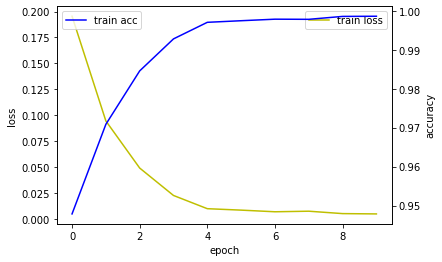

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend()

acc_ax.plot(hist.history['accuracy'], label='train acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend()

plt.show()

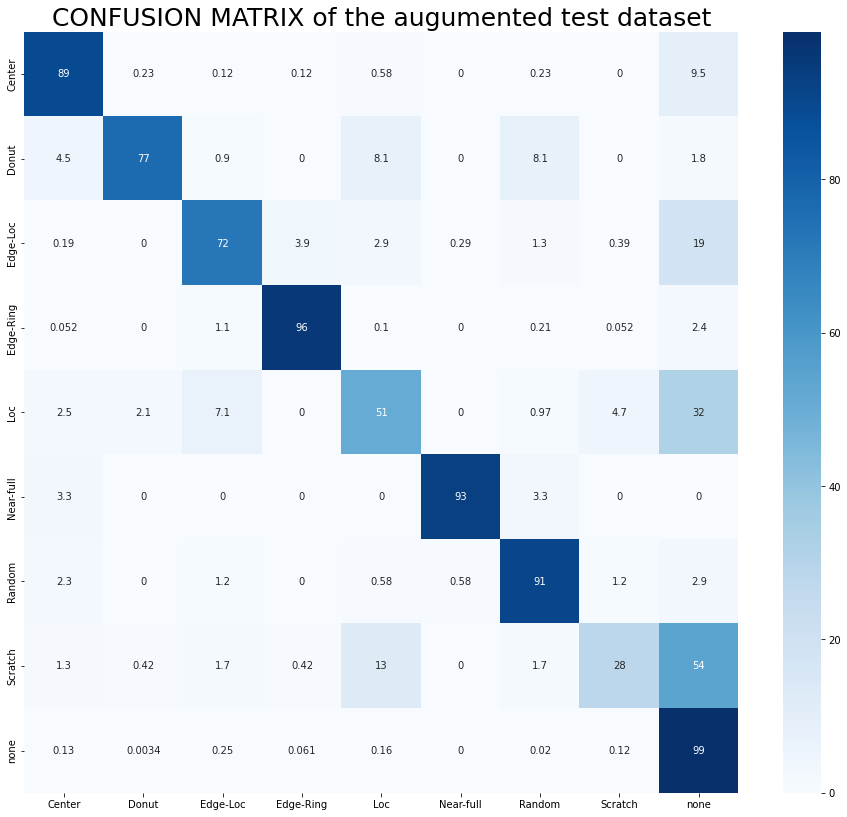

f1score: 96.398


In [ ]:
y_true = y_test
y_pred = model.predict(x_test)
plt.figure(figsize=(16,14))
sns.heatmap(confusion_matrix(encoder.inverse_transform(y_true), 
                             encoder.inverse_transform(y_pred), 
                             normalize = 'true',labels = faulty_case)*100, 
            annot = True, cmap='Blues',xticklabels=faulty_case,yticklabels=faulty_case)
plt.title("CONFUSION MATRIX of the augumented test dataset", fontsize=25)
f1score_ = f1_score(encoder.inverse_transform(y_true), encoder.inverse_transform(y_pred), labels=faulty_case, average='micro')

plt.show()
print('f1score:' ,round(f1score_*100,3))


## Not agumented model

In [ ]:
unaugumented_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=128, verbose=2) 
hist = unaugumented_model.fit(unaugmented_x_train,unaugmented_y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


Epoch 1/10
1081/1081 - 27s - loss: 0.1819 - accuracy: 0.9509 - 27s/epoch - 25ms/step
Epoch 2/10
1081/1081 - 27s - loss: 0.0906 - accuracy: 0.9716 - 27s/epoch - 25ms/step
Epoch 3/10
1081/1081 - 27s - loss: 0.0416 - accuracy: 0.9866 - 27s/epoch - 25ms/step
Epoch 4/10
1081/1081 - 27s - loss: 0.0157 - accuracy: 0.9951 - 27s/epoch - 25ms/step
Epoch 5/10
1081/1081 - 27s - loss: 0.0102 - accuracy: 0.9969 - 27s/epoch - 25ms/step
Epoch 6/10
1081/1081 - 27s - loss: 0.0085 - accuracy: 0.9975 - 27s/epoch - 25ms/step
Epoch 7/10
1081/1081 - 27s - loss: 0.0077 - accuracy: 0.9975 - 27s/epoch - 25ms/step
Epoch 8/10
1081/1081 - 27s - loss: 0.0077 - accuracy: 0.9979 - 27s/epoch - 25ms/step
Epoch 9/10
1081/1081 - 27s - loss: 0.0056 - accuracy: 0.9982 - 27s/epoch - 25ms/step
Epoch 10/10
1081/1081 - 27s - loss: 0.0055 - accuracy: 0.9984 - 27s/epoch - 25ms/step


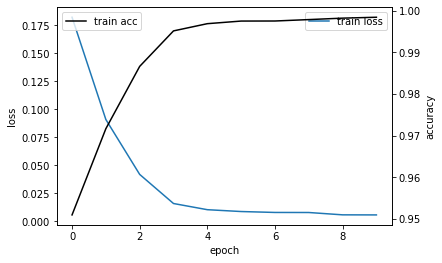

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend()

acc_ax.plot(hist.history['accuracy'],'k' ,label='train acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend()

plt.show()

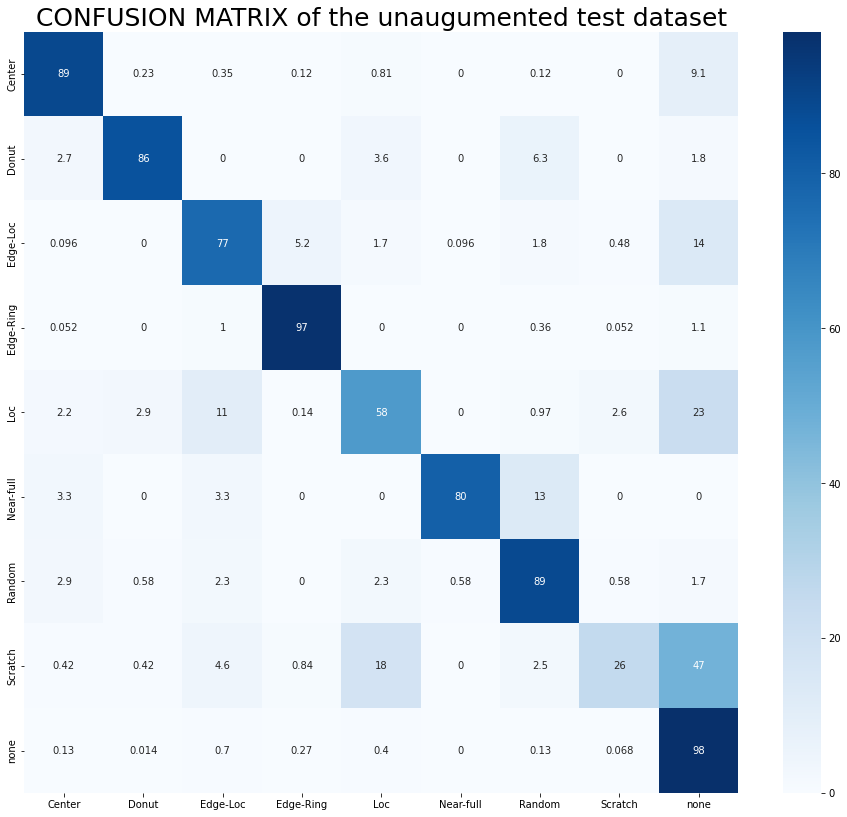

f1score: 95.921


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_true = y_test
y_pred = unaugumented_model.predict(x_test)
plt.figure(figsize=(16,14))
sns.heatmap(confusion_matrix(encoder.inverse_transform(y_true), 
                             encoder.inverse_transform(y_pred), 
                             normalize = 'true',labels = faulty_case)*100, 
            annot = True, cmap='Blues',xticklabels=faulty_case,yticklabels=faulty_case)
plt.title("CONFUSION MATRIX of the unaugumented test dataset", fontsize=25) # 여전히 none에만 집중하는 형태 확인
plt.show()
f1score_ = f1_score(encoder.inverse_transform(y_true), encoder.inverse_transform(y_pred), labels=faulty_case, average='micro')
print('f1score:' ,round(f1score_*100,3))

## augumented model with focal loss

In [ ]:
# !pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 9.4 MB/s 


In [ ]:
import tensorflow_addons as tfa

In [ ]:
def create_model(width=32):
    input_shape = (width, width, 3)
    input_tensor = Input(input_shape)
    conv_1 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(input_tensor)
    conv_2 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(conv_1)
    conv_3 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(conv_2)

    flat = layers.Flatten()(conv_3)

    dense_1 = layers.Dense(512, activation='relu')(flat)
    dense_2 = layers.Dense(128, activation='relu')(dense_1)
    output_tensor = layers.Dense(9, activation='softmax')(dense_2)

    model = models.Model(input_tensor, output_tensor)
    model.compile(optimizer='Adam',
                 loss=tfa.losses.SigmoidFocalCrossEntropy(),
                 metrics=['accuracy'])

    return model

In [ ]:
model_focal = KerasClassifier(build_fn=create_model, epochs=10, batch_size=128, verbose=2) 
hist = model_focal.fit(x_train,y_train) # stopped

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


Epoch 1/10
1109/1109 - 28s - loss: -1.5890e+05 - accuracy: 0.0545 - 28s/epoch - 26ms/step
Epoch 2/10
1109/1109 - 27s - loss: -1.5903e+05 - accuracy: 0.0546 - 27s/epoch - 25ms/step
Epoch 3/10
1109/1109 - 28s - loss: -1.5903e+05 - accuracy: 0.0546 - 28s/epoch - 25ms/step
Epoch 4/10


KeyboardInterrupt: ignored

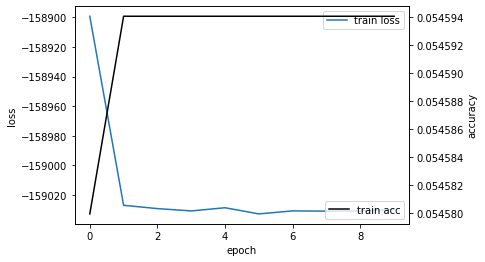

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend()

acc_ax.plot(hist.history['accuracy'],'k', label='train acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend()

plt.show()

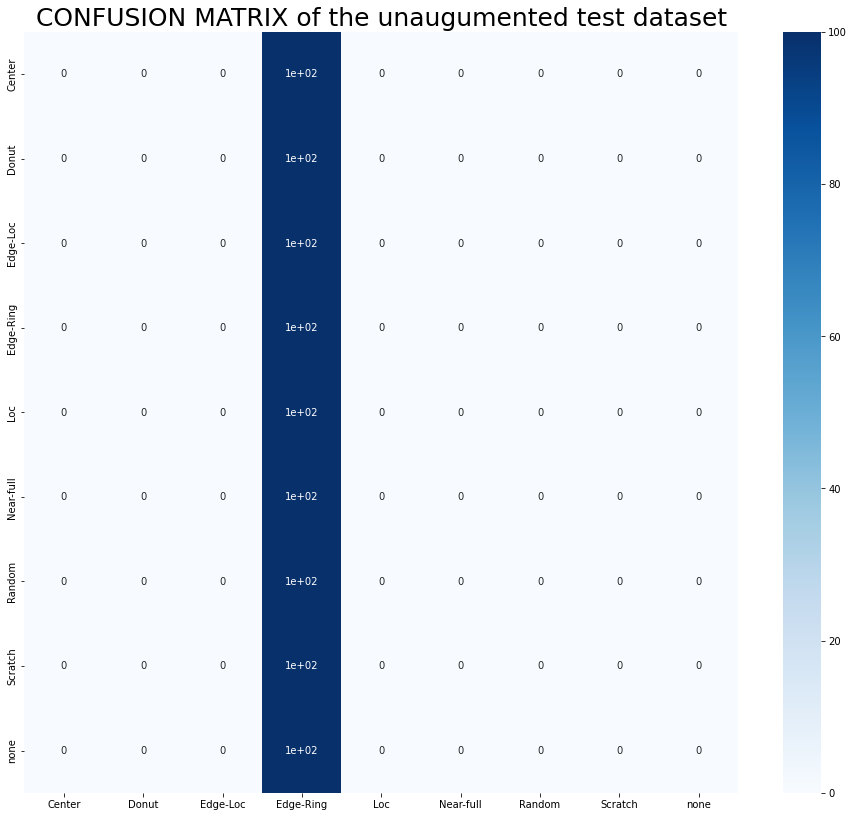

In [ ]:
y_true = y_test
y_pred = model_focal.predict(x_test)
plt.figure(figsize=(16,14))
sns.heatmap(confusion_matrix(encoder.inverse_transform(y_true), 
                             y_pred, 
                             normalize = 'true',labels = faulty_case)*100, 
            annot = True, cmap='Blues',xticklabels=faulty_case,yticklabels=faulty_case)
plt.title("CONFUSION MATRIX of the unaugumented test dataset", fontsize=25) # 모든 데이터를 Edge-ring 으로 오판단
plt.show()

In [ ]:
y_pred # It predicts all data as Edge-Ring

array(['Edge-Ring', 'Edge-Ring', 'Edge-Ring', ..., 'Edge-Ring',
       'Edge-Ring', 'Edge-Ring'], dtype=object)